In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline


#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

Using TensorFlow backend.


In [14]:
#모델(Hd5) 다운로드
# include_top=False CNN 부분만 추출, 특징 추출만 색출하겠다 이말이지
# include_top=True(default) CNN + 신경망 전부 추출

#Load the VGG model
#vgg_model = vgg16.VGG16(weights='imagenet')
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False)# include_top 은 default로 TOP 설정이 되어 있음.

#Load the Inception_V3 model
#inception_model = inception_v3.InceptionV3(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False)


#Load the ResNet50 model
#resnet_model = resnet50.ResNet50(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False)

 
#Load the MobileNet model
#mobilenet_model = mobilenet.MobileNet(weights='imagenet')  
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False)  

87916544/87910968 [==============================] - 17s 0us/step


C:\Users\student\.conda\envs\myoung_lab\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 32s 0us/step


C:\Users\student\.conda\envs\myoung_lab\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 6s 0us/step


In [15]:
vgg_model.summary()    # 138,357,544, #이 네트워크 쓸라면 이미지가 무조건 224,244 이어야 한다.
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

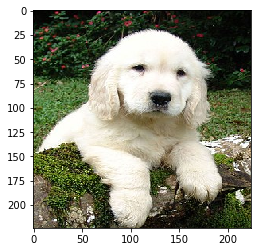

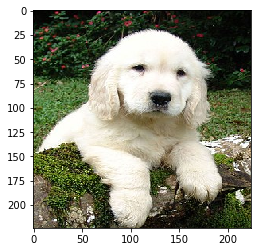

image batch size (1, 224, 224, 3)


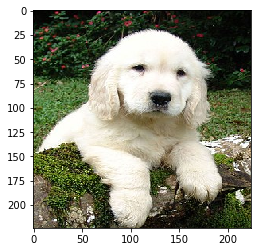

In [4]:
filename = 'dog.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image)) #  uint8은 0~255 사이 값
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [8]:
processed_image = vgg16.preprocess_input(image_batch.copy()) #preprocess 함수는 각각 모델마다 있다.전처리 과정에서는 원본이 변경될 수 있어 복사(copy)를 해서 준다.
print(processed_image.shape)
print(processed_image.dtype)
print(processed_image[0])

(1, 224, 224, 3)
float32
[[[ -97.939     -108.779     -115.68     ]
  [-100.939     -111.779     -118.68     ]
  [ -98.939     -109.779     -116.68     ]
  ...
  [ -96.939     -111.779     -118.68     ]
  [-100.939     -115.779     -122.68     ]
  [ -98.939     -113.779     -120.68     ]]

 [[ -99.939     -110.779     -117.68     ]
  [-101.939     -112.779     -119.68     ]
  [-102.939     -113.779     -120.68     ]
  ...
  [ -95.939     -108.779     -115.68     ]
  [ -95.939     -108.779     -115.68     ]
  [ -92.939     -105.779     -112.68     ]]

 [[ -99.939     -110.779     -117.68     ]
  [-101.939     -112.779     -119.68     ]
  [-100.939     -111.779     -118.68     ]
  ...
  [ -95.939     -108.779     -115.68     ]
  [ -94.939     -107.779     -114.68     ]
  [ -92.939     -105.779     -112.68     ]]

 ...

 [[  -8.939003     6.2210007   -0.6800003]
  [   6.060997    21.221       14.32     ]
  [  -6.939003     5.2210007    2.3199997]
  ...
  [ -78.939      -45.779      -71.68

In [9]:
predictions = vgg_model.predict(processed_image) # 1000개 분류에서 최대값을 찾으면 된다.
print(predictions.shape)
print(predictions)

(1, 1000)
[[3.77879478e-10 4.10455663e-11 2.23023974e-10 6.87099475e-11
  5.54495783e-10 3.24593463e-09 1.94754501e-09 4.49455051e-09
  1.37389762e-07 8.08461076e-10 9.94512667e-11 1.95631150e-10
  8.26521018e-10 9.10656994e-10 7.95083388e-10 2.83884222e-10
  1.87597007e-10 8.09294132e-10 8.85836737e-10 3.38910100e-09
  3.16011661e-09 5.24752533e-11 2.56633559e-09 6.02938499e-09
  2.23915890e-08 1.03339859e-09 9.80789477e-11 5.71883541e-10
  7.20078497e-10 2.96562525e-10 1.12538245e-09 5.32466027e-09
  4.03188682e-09 3.14125881e-09 4.10410683e-09 7.13733850e-10
  5.31582156e-09 6.07640438e-10 1.40945200e-10 1.38435219e-09
  5.49919443e-10 1.35781664e-10 7.19992954e-11 8.05376765e-10
  7.61439523e-11 1.59001279e-09 2.48077292e-09 7.80124576e-10
  5.70992276e-09 2.29713337e-09 5.07489828e-09 7.98225708e-10
  5.18519561e-10 1.17814675e-10 7.56989915e-10 3.78276299e-09
  1.99149119e-09 9.33271516e-11 3.25152211e-10 6.35321629e-10
  1.86595051e-09 1.16521903e-09 1.03268138e-09 1.87030377e-1

In [10]:
#확률 값에서 맥시멈을 찾고 그 멕시멈 인덱스에 해당되는 종류를 찾아줌
label_vgg = decode_predictions(predictions, top=10) # 1000개 중 top 10개 가져와라
print(label_vgg)

[[('n02099601', 'golden_retriever', 0.64436024), ('n02102318', 'cocker_spaniel', 0.119697005), ('n02104029', 'kuvasz', 0.07585055), ('n02111500', 'Great_Pyrenees', 0.06708467), ('n02113799', 'standard_poodle', 0.053745076), ('n02108551', 'Tibetan_mastiff', 0.009482327), ('n02102480', 'Sussex_spaniel', 0.008277561), ('n02111277', 'Newfoundland', 0.0065834178), ('n02101556', 'clumber', 0.0035433779), ('n02105505', 'komondor', 0.0026917087)]]


In [11]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet

processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

filename = 'dog.jpg'
original = load_img(filename, target_size=(299, 299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

[[('n02099601', 'golden_retriever', 0.5132296),
  ('n02104029', 'kuvasz', 0.08877095),
  ('n02111500', 'Great_Pyrenees', 0.036654003),
  ('n02102318', 'cocker_spaniel', 0.0280543),
  ('n02113799', 'standard_poodle', 0.013501678)]]

In [13]:
import cv2
img = cv2.imread("dog.jpg")
img = cv2.resize(img, (1000,1000))
cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3) #이름, 확률
cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("out.jpg", img)

True